<a href="https://colab.research.google.com/github/isque03/deeplearning_colab/blob/main/torch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn

w = 1.9337, b = 1.0174


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


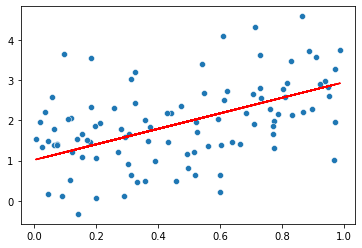

In [3]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Create the model and set the weights
model = LinearRegression()
w = torch.tensor([[2.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)
model.linear.weight = nn.Parameter(w)
model.linear.bias = nn.Parameter(b)

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Generate some data
np.random.seed(42)
x_values = np.random.rand(100, 1)
y_values = 2 * x_values + 1 + np.random.randn(100, 1)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(x_values).float()
y_train = torch.from_numpy(y_values).float()

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the final weights
print(f'w = {model.linear.weight.item():.4f}, b = {model.linear.bias.item():.4f}')

# Plot the results
sns.scatterplot(x_values.flatten(), y_values.flatten())
plt.plot(x_values, y_pred.data.numpy(), 'r-')
plt.show()
